## Financial Data

Google: "python github finance"
https://github.com/yhilpisch
https://github.com/lukaszbanasiak/yahoo-finance
https://github.com/wilsonfreitas/awesome-quant

### Learning Objectives:
    how to retrieve stock price data with pandas (datareader)
    how to look up information about and data stored in a DataFrame object
    how to select columns and rows from a DataFrame object
    how to visulize data stored in a DataFrame object
    how to do vectorized calculations with DataFrame objects (log returns, moving average)
    What you have learned today builds the basis for many important use cases for Python in Finance.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
symbol = 'AAPL'
stock_data = web.DataReader(symbol, data_source='google')

#http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [3]:
type(stock_data)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-10-19 to 2017-10-17
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [4]:
stock_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-11,155.97,156.98,155.75,156.55,16905640
2017-10-12,156.35,157.37,155.73,156.00,16125054
2017-10-13,156.73,157.28,156.41,156.99,16394188
2017-10-16,157.90,160.00,157.65,159.88,24121452
2017-10-17,159.78,160.87,159.23,160.47,18997275


In [16]:
stock_data['Close'].head()

#https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html

Date
2016-10-17    117.55
2016-10-18    117.47
2016-10-19    117.12
2016-10-20    117.06
2016-10-21    116.60
Name: Close, dtype: float64

In [17]:
stock_data[['Open', 'Close']].tail()

,Open,Close
Date,,
2017-10-09,155.81,155.84
2017-10-10,156.06,155.90
2017-10-11,155.97,156.55
2017-10-12,156.35,156.00
2017-10-13,156.73,156.99


In [18]:
stock_data.loc['2017-07-28']

Open           149.89
High           150.23
Low            149.19
Close          149.50
Volume    17213653.00
Name: 2017-07-28 00:00:00, dtype: float64

In [19]:
stock_data.iloc[:2]

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-17,117.33,117.84,116.78,117.55,23624896
2016-10-18,118.18,118.21,117.45,117.47,24553478


## Data Visualization

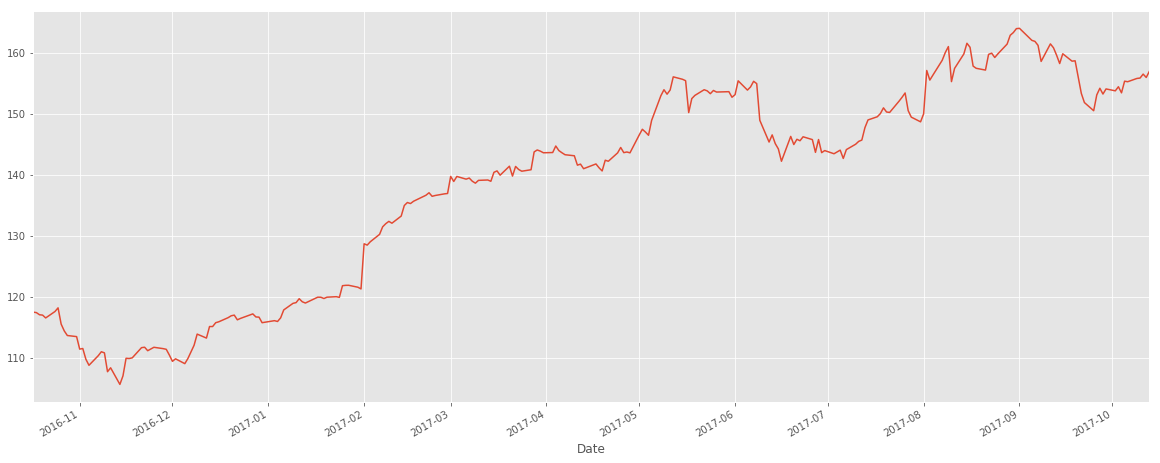

In [24]:
stock_data['Close'].plot(figsize=(20,8));

In [27]:
# fully vectorized operation for log return calculation
rets = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

#https://quantivity.wordpress.com/2011/02/21/why-log-returns/

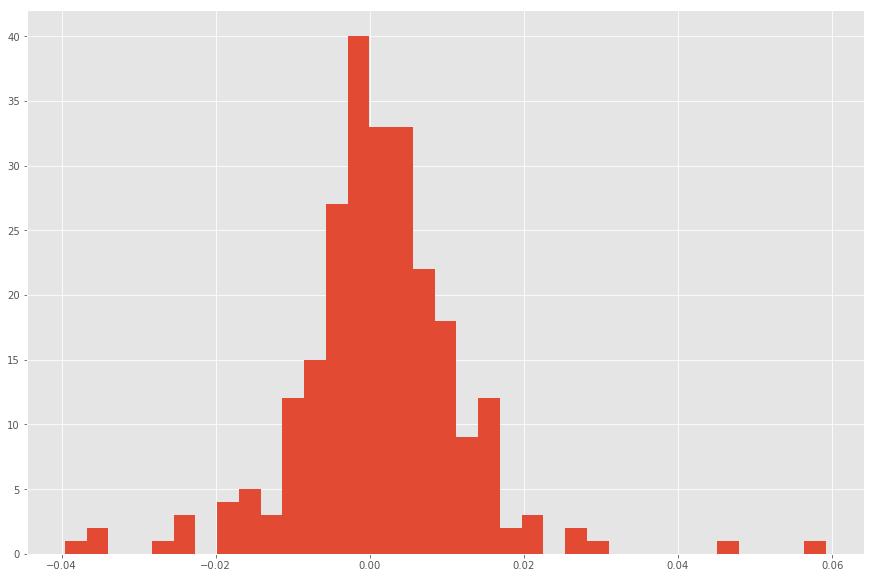

In [28]:
#the log returns can then be visualized via a histogram
rets.hist(figsize=(15, 10), bins=35);

In [29]:
# fully vectorized calculation of 50 days moving average/trend
stock_data['MA50'] = stock_data['Close'].rolling(50).mean()

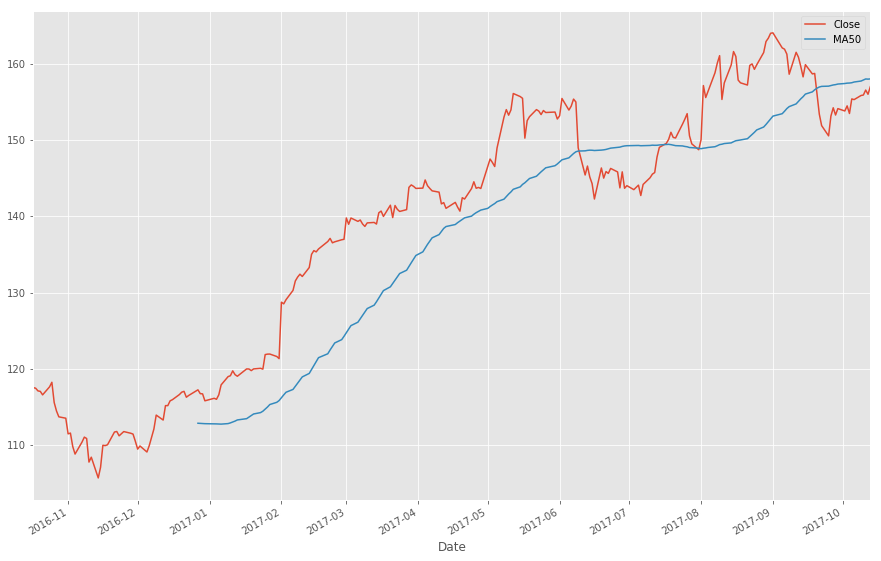

In [32]:
stock_data[['Close', 'MA50']].plot(figsize=(15, 10));

In [31]:
stock_data.head()

,Open,High,Low,Close,Volume,MA50
Date,,,,,,
2016-10-17,117.33,117.84,116.78,117.55,23624896,NaN
2016-10-18,118.18,118.21,117.45,117.47,24553478,NaN
2016-10-19,117.25,117.76,113.80,117.12,20034594,NaN
2016-10-20,116.86,117.38,116.33,117.06,24125801,NaN
2016-10-21,116.81,116.91,116.28,116.60,23192665,NaN
